In [86]:
import tensorflow as tf

In [87]:
train_ds, test_ds = tf.keras.utils.image_dataset_from_directory(
    "../Data/DataLaba5/data3/",  # путь к изображениям
    validation_split=0.25,  # процент на тест
    subset="both",  # берем и обучающую и тестовую выборку
    seed=42,  # сид генератора случайных чисел
    labels='inferred',
    color_mode='rgb',
    shuffle=True,
    # целевой размер изображения (СНАЧАЛА ВЫСОТА, ПОТОМ ШИРИНА)
    image_size=(224, 224),
    batch_size=10,  # размер пакета (батча)
)


Found 2000 files belonging to 2 classes.
Using 1500 files for training.
Using 500 files for validation.


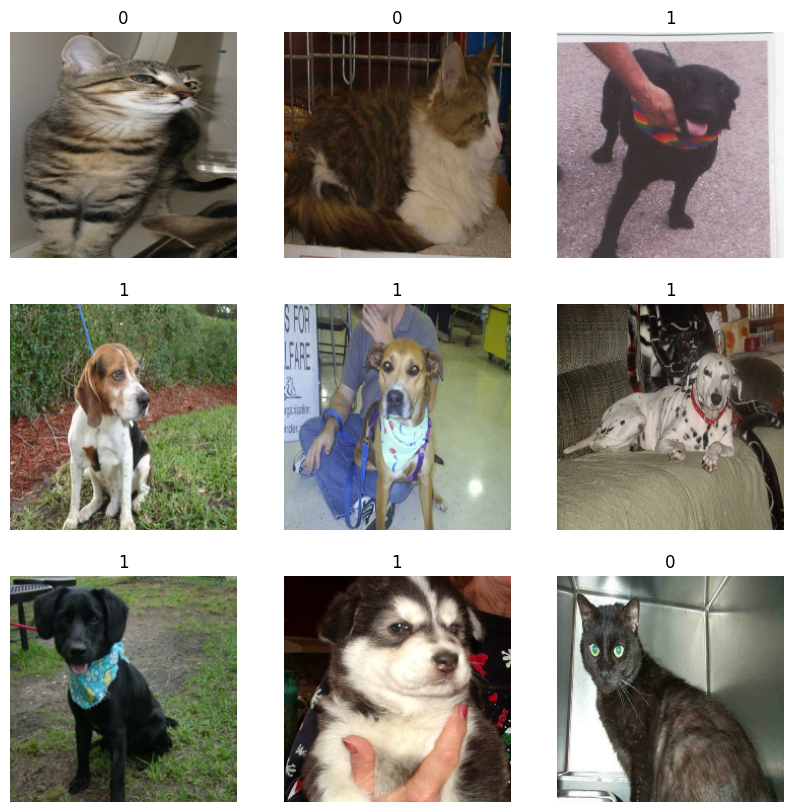

In [88]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
# берем один батч
for images, labels in train_ds.take(1):
    # отрисуем 9 картинок из батча
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        # выводим картинку
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        # выключаем оси (чтобы они не отображались)
        plt.axis("off")


In [89]:
data_augmentation = tf.keras.Sequential(
    [
        tf.keras.layers.RandomFlip("horizontal"),
        tf.keras.layers.RandomRotation(0.1),
    ]
)


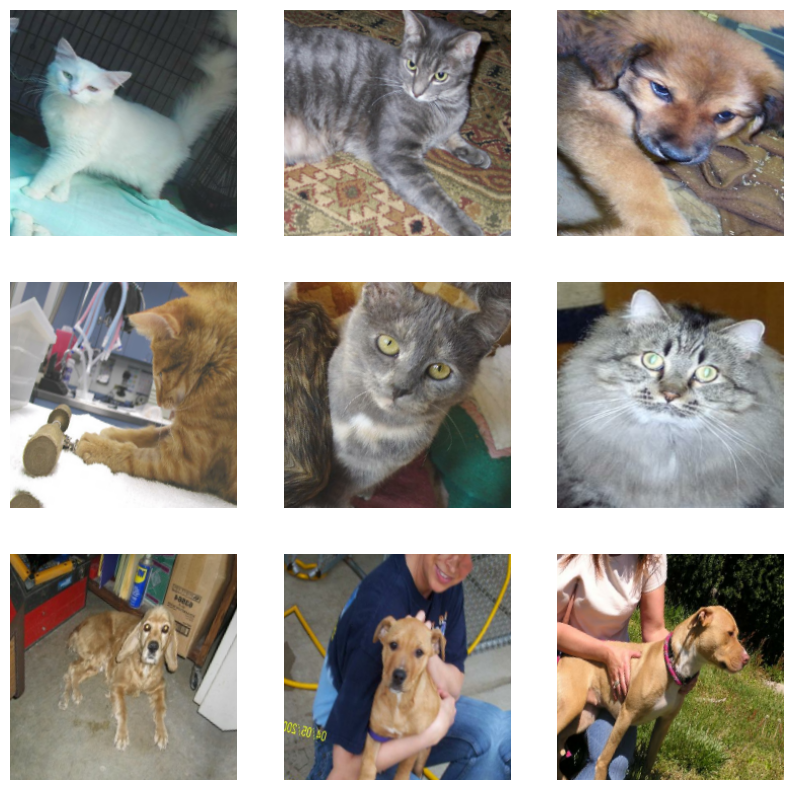

In [90]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[i].numpy().astype("uint8"))
        plt.axis("off")


In [91]:
train_ds = train_ds.map(
    lambda img, label: (data_augmentation(img), label)
)


In [96]:
# входной слой - размер (200, 400, 3)
inputs = tf.keras.Input(shape=(224, 224, 3))
# преобразуем значения пикселей из [0, 255] к [0, 1]
x = tf.keras.layers.Rescaling(1.0 / 255)(inputs)
# второй сверточный слой
x = tf.keras.layers.Conv2D(250, 4, strides=2, padding="same")(x)
# второй пулинг
x = tf.keras.layers.MaxPooling2D(3, strides=2, padding="same")(x)
# второй сверточный слой
x = tf.keras.layers.Conv2D(64, 4, strides=2, padding="same")(x)
# второй пулинг
x = tf.keras.layers.MaxPooling2D(3, strides=2, padding="same")(x)
# выпрямляем многомерный массив
x = tf.keras.layers.Flatten()(x)
# полносвязный слой с 64 нейронами
x = tf.keras.layers.Dense(64, activation="relu")(x)
x = tf.keras.layers.Dense(25, activation="sigmoid")(x)
x = tf.keras.layers.Dense(10, activation="sigmoid")(x)
# выходной слой с функцией sofrmax
outputs = tf.keras.layers.Dense(1, activation="tanh")(x)
model = tf.keras.Model(inputs, outputs)


In [97]:
model.summary()


Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 rescaling_5 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_11 (Conv2D)          (None, 112, 112, 250)     12250     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 56, 56, 250)      0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 28, 28, 64)        256064    
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                      

In [98]:
model.compile(optimizer=tf.keras.optimizers.Adam(1e-2),
              loss="binary_crossentropy", metrics=["mse", 'accuracy'])


In [99]:
model.fit(train_ds, epochs=1, validation_data=test_ds)

150/150 [==============================] - 35s 230ms/step - loss: 7.5377 - mse: 0.9102 - accuracy: 0.5113 - val_loss: 8.2369 - val_mse: 0.9851 - val_accuracy: 0.4660


In [100]:
p = model.predict(test_ds.take(10))
p

10/10 [==============================] - 1s 52ms/step


array([[-0.3246435 ],
       [-0.3214334 ],
       [-0.32767594],
       [-0.32651123],
       [-0.32500732],
       [-0.32509923],
       [-0.32109484],
       [-0.32550123],
       [-0.32648867],
       [-0.32684717],
       [-0.32602778],
       [-0.323342  ],
       [-0.32920524],
       [-0.32189307],
       [-0.31895375],
       [-0.32515803],
       [-0.326432  ],
       [-0.32718083],
       [-0.32386354],
       [-0.3257205 ],
       [-0.32252976],
       [-0.3266124 ],
       [-0.3239845 ],
       [-0.32556158],
       [-0.32289657],
       [-0.32297343],
       [-0.32405537],
       [-0.32244563],
       [-0.31668282],
       [-0.32627168],
       [-0.32111105],
       [-0.32653806],
       [-0.32226124],
       [-0.3257651 ],
       [-0.32582003],
       [-0.32445404],
       [-0.32276294],
       [-0.32473215],
       [-0.3208213 ],
       [-0.32271433],
       [-0.32256433],
       [-0.32621533],
       [-0.32471365],
       [-0.3257378 ],
       [-0.3255665 ],
       [-0

In [101]:
from sklearn.metrics import classification_report
import numpy as np

In [102]:
k = np.array([])
for i, j in test_ds.take(10):
    k = np.append(k, np.array(j))
k

array([1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0.,
       0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0.,
       1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0.,
       1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1.])

In [103]:
print(classification_report(p > p.mean(), k))


              precision    recall  f1-score   support

       False       0.47      0.47      0.47        51
        True       0.45      0.45      0.45        49

    accuracy                           0.46       100
   macro avg       0.46      0.46      0.46       100
weighted avg       0.46      0.46      0.46       100



## Enother

In [104]:
vgg = tf.keras.applications.VGG19(weights='imagenet', include_top=True)
vgg.summary()


Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [108]:
inp = vgg.input
new_classification_layer = tf.keras.layers.Dense(1, activation='sigmoid')
out = new_classification_layer(vgg.layers[-2].output)
model_new = tf.keras.Model(inp, out)
model_new.summary()
for layer in model_new.layers:
    layer.trainable = False
model_new.layers[-1].trainable = True


Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

 block4_pool (MaxPooling2D)  (None, 14, 14, 512)       0         
                                                                 
 block5_conv1 (Conv2D)       (None, 14, 14, 512)       2359808   
                                                                 
 block5_conv2 (Conv2D)       (None, 14, 14, 512)       2359808   
                                                                 
 block5_conv3 (Conv2D)       (None, 14, 14, 512)       2359808   
                                                                 
 block5_conv4 (Conv2D)       (None, 14, 14, 512)       2359808   
                                                                 
 block5_pool (MaxPooling2D)  (None, 7, 7, 512)         0         
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 fc1 (Dense)                 (None, 4096)              102764544 
          

In [109]:
model_new.compile(loss='binary_crossentropy',
                  optimizer='adam', metrics=['accuracy'])
model_new.summary()


Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [110]:
p = model_new.fit(train_ds, epochs=5, validation_data=test_ds)


Epoch 1/5
150/150 [==============================] - 156s 1s/step - loss: 0.2468 - accuracy: 0.8980 - val_loss: 0.0831 - val_accuracy: 0.9660
Epoch 2/5
150/150 [==============================] - 157s 1s/step - loss: 0.1275 - accuracy: 0.9500 - val_loss: 0.0624 - val_accuracy: 0.9780
Epoch 3/5
150/150 [==============================] - 151s 1s/step - loss: 0.1149 - accuracy: 0.9527 - val_loss: 0.0633 - val_accuracy: 0.9720
Epoch 4/5
150/150 [==============================] - 151s 1s/step - loss: 0.0968 - accuracy: 0.9627 - val_loss: 0.0591 - val_accuracy: 0.9740
Epoch 5/5
150/150 [==============================] - 152s 1s/step - loss: 0.0885 - accuracy: 0.9673 - val_loss: 0.0792 - val_accuracy: 0.9720


In [115]:
p.history


{'loss': [0.24675902724266052,
  0.12753766775131226,
  0.11485625058412552,
  0.09676121920347214,
  0.08853749930858612],
 'accuracy': [0.8980000019073486,
  0.949999988079071,
  0.9526666402816772,
  0.9626666903495789,
  0.9673333168029785],
 'val_loss': [0.08311226218938828,
  0.06243124231696129,
  0.06329717487096786,
  0.05911986902356148,
  0.07920052111148834],
 'val_accuracy': [0.9660000205039978,
  0.9779999852180481,
  0.972000002861023,
  0.9739999771118164,
  0.972000002861023]}

In [118]:
p = model_new.predict(test_ds.take(10))
p


10/10 [==============================] - 9s 920ms/step


array([[9.99992371e-01],
       [6.40697896e-01],
       [9.99999285e-01],
       [9.99999702e-01],
       [1.95503690e-05],
       [9.99932051e-01],
       [9.99996781e-01],
       [1.46791135e-05],
       [9.70106483e-01],
       [9.01159272e-03],
       [9.99998033e-01],
       [9.99995172e-01],
       [5.39523375e-04],
       [3.18301056e-04],
       [9.99999285e-01],
       [9.96490777e-01],
       [9.28080335e-05],
       [1.06093685e-08],
       [9.97932017e-01],
       [1.27906460e-05],
       [8.60094267e-04],
       [9.94528472e-01],
       [9.78616416e-01],
       [9.99998927e-01],
       [3.11040203e-05],
       [2.97652223e-05],
       [2.26894971e-02],
       [9.56450240e-04],
       [1.67283614e-03],
       [3.54204385e-05],
       [9.89028704e-05],
       [1.32712506e-04],
       [7.00416131e-05],
       [9.97941061e-06],
       [9.99951959e-01],
       [1.69422929e-05],
       [9.99434412e-01],
       [2.03734930e-06],
       [2.02165840e-08],
       [4.53862668e-07],


In [119]:
k = np.array([])
for i, j in test_ds.take(10):
    k = np.append(k, np.array(j))
k
print(classification_report(p > p.mean(), k))


              precision    recall  f1-score   support

       False       0.98      0.98      0.98        51
        True       0.98      0.98      0.98        49

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



# enother

In [122]:
inc = tf.keras.applications.inception_v3.InceptionV3(weights='imagenet', include_top=True)
inc.summary()


96112376/96112376 [==============================] - 12s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_13 (Conv2D)             (None, 149, 149, 32  864         ['input_9[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d_13[0][0]']              
 alization)          

In [ ]:
inp = inc.input
new_classification_layer = tf.keras.layers.Dense(1, activation='sigmoid')
out = new_classification_layer(inc.layers[-2].output)
model_new = tf.keras.Model(inp, out)
model_new.summary()
for layer in model_new.layers:
    layer.trainable = False
model_new.layers[-1].trainable = True


Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

 block4_pool (MaxPooling2D)  (None, 14, 14, 512)       0         
                                                                 
 block5_conv1 (Conv2D)       (None, 14, 14, 512)       2359808   
                                                                 
 block5_conv2 (Conv2D)       (None, 14, 14, 512)       2359808   
                                                                 
 block5_conv3 (Conv2D)       (None, 14, 14, 512)       2359808   
                                                                 
 block5_conv4 (Conv2D)       (None, 14, 14, 512)       2359808   
                                                                 
 block5_pool (MaxPooling2D)  (None, 7, 7, 512)         0         
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 fc1 (Dense)                 (None, 4096)              102764544 
          

In [123]:
model_new.compile(loss='binary_crossentropy',
                  optimizer='adam', metrics=['accuracy'])
model_new.summary()


Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [124]:
p = model_new.fit(train_ds, epochs=5, validation_data=test_ds)


Epoch 1/5
150/150 [==============================] - 164s 1s/step - loss: 0.0823 - accuracy: 0.9707 - val_loss: 0.0643 - val_accuracy: 0.9720
Epoch 2/5
150/150 [==============================] - 157s 1s/step - loss: 0.0774 - accuracy: 0.9667 - val_loss: 0.0682 - val_accuracy: 0.9760
Epoch 3/5
150/150 [==============================] - 152s 1s/step - loss: 0.0611 - accuracy: 0.9767 - val_loss: 0.0787 - val_accuracy: 0.9660
Epoch 4/5
150/150 [==============================] - 148s 987ms/step - loss: 0.0683 - accuracy: 0.9753 - val_loss: 0.0713 - val_accuracy: 0.9760
Epoch 5/5
150/150 [==============================] - 149s 991ms/step - loss: 0.0592 - accuracy: 0.9793 - val_loss: 0.0850 - val_accuracy: 0.9720


In [ ]:
p.history


{'loss': [0.24675902724266052,
  0.12753766775131226,
  0.11485625058412552,
  0.09676121920347214,
  0.08853749930858612],
 'accuracy': [0.8980000019073486,
  0.949999988079071,
  0.9526666402816772,
  0.9626666903495789,
  0.9673333168029785],
 'val_loss': [0.08311226218938828,
  0.06243124231696129,
  0.06329717487096786,
  0.05911986902356148,
  0.07920052111148834],
 'val_accuracy': [0.9660000205039978,
  0.9779999852180481,
  0.972000002861023,
  0.9739999771118164,
  0.972000002861023]}

In [ ]:
p = model_new.predict(test_ds.take(10))
p


10/10 [==============================] - 9s 920ms/step


array([[9.99992371e-01],
       [6.40697896e-01],
       [9.99999285e-01],
       [9.99999702e-01],
       [1.95503690e-05],
       [9.99932051e-01],
       [9.99996781e-01],
       [1.46791135e-05],
       [9.70106483e-01],
       [9.01159272e-03],
       [9.99998033e-01],
       [9.99995172e-01],
       [5.39523375e-04],
       [3.18301056e-04],
       [9.99999285e-01],
       [9.96490777e-01],
       [9.28080335e-05],
       [1.06093685e-08],
       [9.97932017e-01],
       [1.27906460e-05],
       [8.60094267e-04],
       [9.94528472e-01],
       [9.78616416e-01],
       [9.99998927e-01],
       [3.11040203e-05],
       [2.97652223e-05],
       [2.26894971e-02],
       [9.56450240e-04],
       [1.67283614e-03],
       [3.54204385e-05],
       [9.89028704e-05],
       [1.32712506e-04],
       [7.00416131e-05],
       [9.97941061e-06],
       [9.99951959e-01],
       [1.69422929e-05],
       [9.99434412e-01],
       [2.03734930e-06],
       [2.02165840e-08],
       [4.53862668e-07],


In [ ]:
k = np.array([])
for i, j in test_ds.take(10):
    k = np.append(k, np.array(j))
k
print(classification_report(p > p.mean(), k))


              precision    recall  f1-score   support

       False       0.98      0.98      0.98        51
        True       0.98      0.98      0.98        49

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100

